# SLC FINAL EXAM

### ATTRIBUTE INFORMATION:  
Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists. 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


**Education**

1 'Below College' 

2 'College' 

3 'Bachelor' 

4 'Master' 

5 'Doctor'


**Environment Satisfaction**


1 'Low' 

2 'Medium' 

3 'High' 

4 'Very High' 

**Job Involvement** 

1 'Low' 

2 'Medium' 

3 'High' 

4 'Very High' 


**Job Satisfaction 
1 'Low' 
2 'Medium'
3 'High' 
4 'Very High' 


Performance Rating 
1 'Low' 
2 'Good' 
3 'Excellent' 
4 'Outstanding' 
Relationship Satisfaction 
1 'Low' 
2 'Medium' 
3 'High' 
4 'Very High' 
Work 
Life Balance 
1 'Bad' 
2 'Good' 
3 'Better' 
4 'Best' 
 

 

In [159]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.metrics import recall_score,precision_score,cohen_kappa_score
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

### 1.	Read the dataset (tab, csv, xls, txt, inbuilt dataset)

In [160]:
# Kindly change the below cells from markdown to code and execute it 

In [161]:
import csv

with open("data_set.csv","r")as file:
    
    reader=csv.reader(file)
    
df=pd.read_csv("data_set.csv")

df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### 2.	Summarize important observations from the data set (5 Marks)

Some pointers which would help you, but don’t be limited by these

a.	Find out number of rows; no. & types of variables (continuous, categorical etc.)

b.	Calculate five-point summary for numerical variables

c.	Summarize observations for categorical variables – no. of categories, % observations in each category


In [162]:
#(a)
df.shape
# There are 917 rows and 35 columns

(917, 35)

In [163]:
df.dtypes
# There are 26 int64 data types 
# There are 9 object data types

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [164]:
#(b)
df.describe().T
# The below table gives the five point summary of the data 
# It gives the count,mean,standard Deviation,min,max of the variables

,count,mean,std,min,25%,50%,75%,max
Age,917.0,36.938931,8.984981,18.0,30.0,36.0,43.0,60.0
DailyRate,917.0,785.711014,401.902148,102.0,444.0,772.0,1141.0,1498.0
DistanceFromHome,917.0,9.294438,8.092566,1.0,2.0,7.0,14.0,29.0
Education,917.0,2.921483,1.020717,1.0,2.0,3.0,4.0,5.0
EmployeeCount,917.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,917.0,1413.466739,388.606884,1.0,1084.0,1425.0,1737.0,2068.0
EnvironmentSatisfaction,917.0,2.738277,1.103382,1.0,2.0,3.0,4.0,4.0
HourlyRate,917.0,66.231189,20.237536,30.0,49.0,66.0,84.0,100.0
JobInvolvement,917.0,2.721919,0.720936,1.0,2.0,3.0,3.0,4.0
JobLevel,917.0,2.044711,1.100400,1.0,1.0,2.0,3.0,5.0


In [165]:
#(c)
df_cat = df.select_dtypes(include="object")
df_num = df.select_dtypes(include = np.number)
for i in df_cat.columns:
    count = df_cat[i].value_counts()
    percentage = (count/len(df_cat))*100
    print(count)
    print(percentage)

No     763
Yes    154
Name: Attrition, dtype: int64
No     83.206107
Yes    16.793893
Name: Attrition, dtype: float64
Travel_Rarely        648
Travel_Frequently    172
Non-Travel            97
Name: BusinessTravel, dtype: int64
Travel_Rarely        70.665213
Travel_Frequently    18.756816
Non-Travel           10.577972
Name: BusinessTravel, dtype: float64
Research & Development    597
Sales                     275
Human Resources            45
Name: Department, dtype: int64
Research & Development    65.103599
Sales                     29.989095
Human Resources            4.907306
Name: Department, dtype: float64
Life Sciences       385
Medical             285
Marketing            92
Technical Degree     82
Other                55
Human Resources      18
Name: EducationField, dtype: int64
Life Sciences       41.984733
Medical             31.079607
Marketing           10.032715
Technical Degree     8.942203
Other                5.997819
Human Resources      1.962923
Name: EducationField,

### 3.	Check for defects in the data. Perform necessary actions to ‘fix’ these defects (5 Marks)

Some pointers which would help you, but don’t be limited by these

a.	Do variables have missing/null values?

b.	Do variables have outliers?

c.	Is the Target distributed evenly? Is it a defect? If Yes, what steps are being taken to rectify the problem. 


In [166]:
#(a)
df.isnull().sum()
# There are no missing values in the data

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

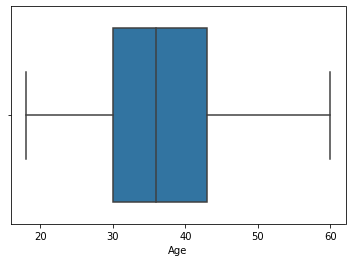

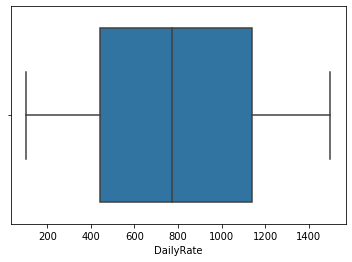

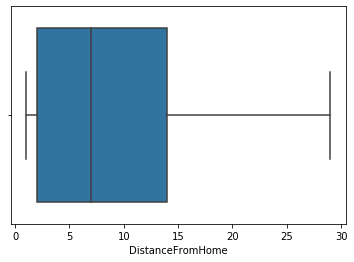

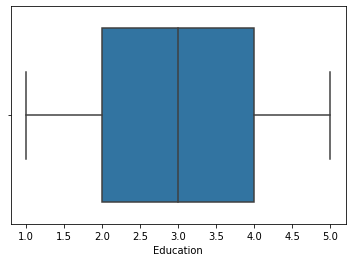

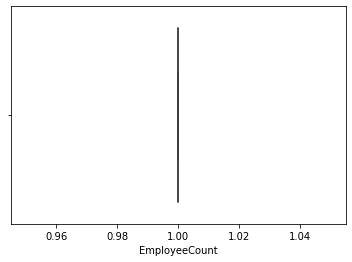

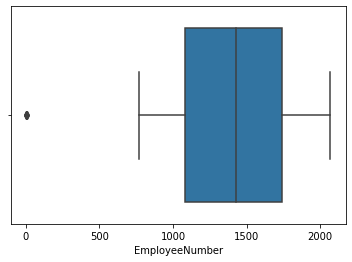

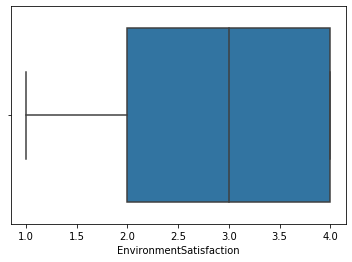

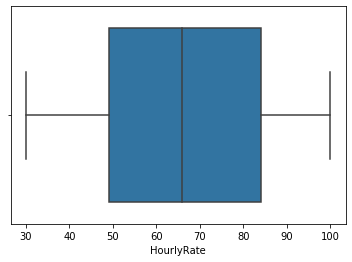

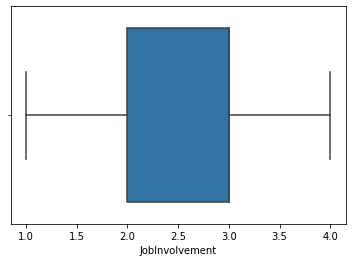

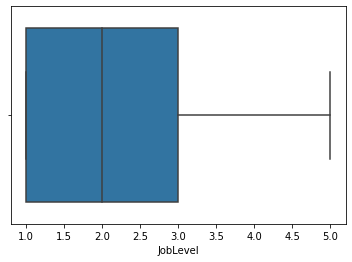

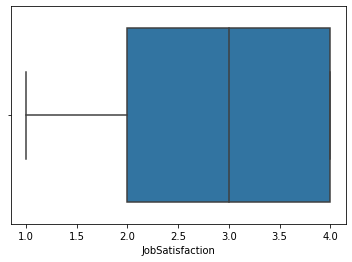

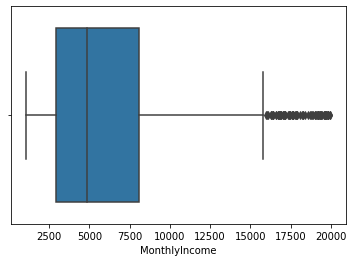

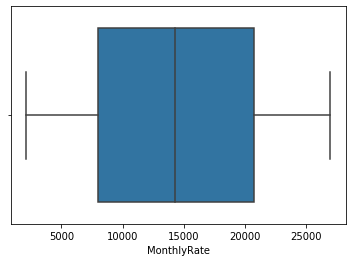

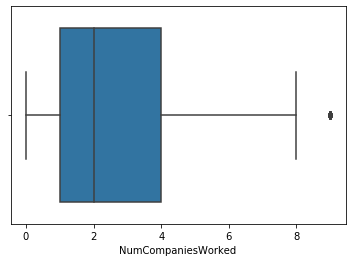

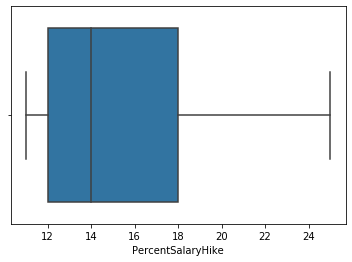

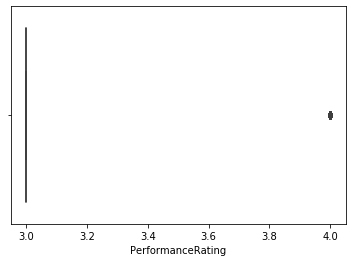

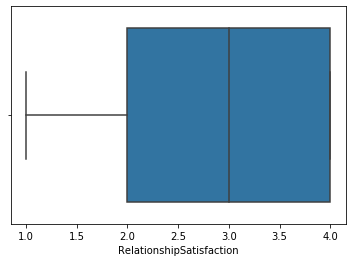

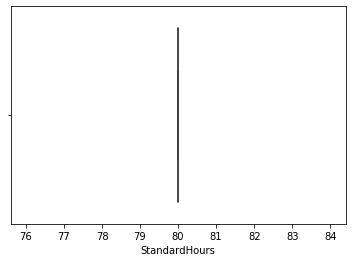

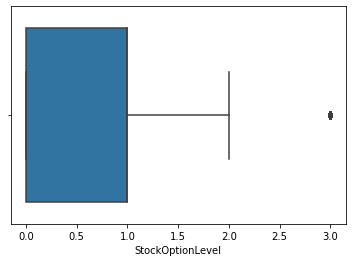

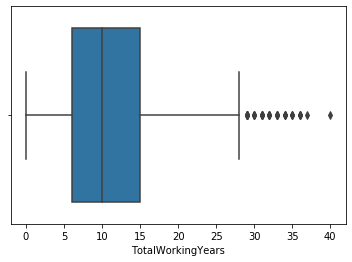

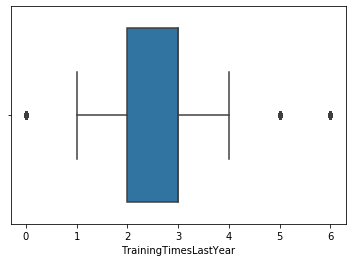

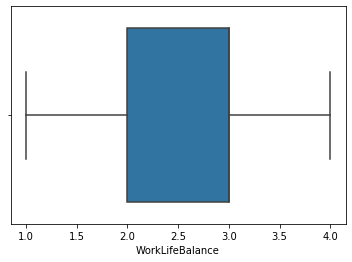

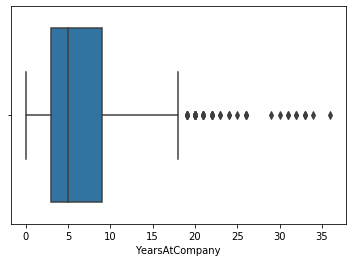

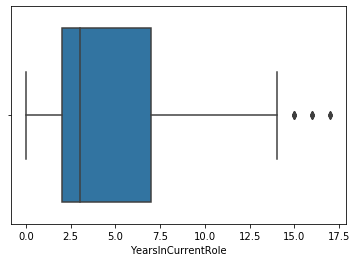

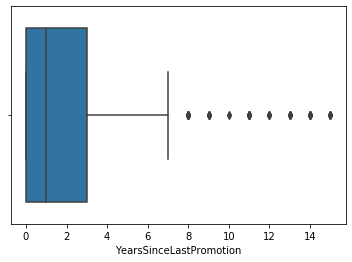

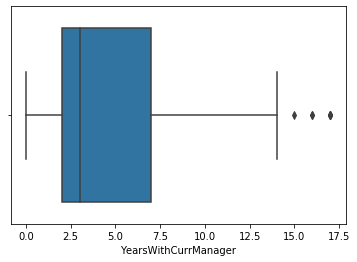

In [167]:
#(b)

for i in df_num.columns:
    sns.boxplot(x=df_num[i])
    plt.show()
# There are outliers in MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,
# TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion, YearsWithCurrManager

In [168]:
#(c)
df["Attrition"].value_counts()
# The Data is imbalanced , 
# We can perform SMOTE technique in order to balance the data

No     763
Yes    154
Name: Attrition, dtype: int64

### 4.	Summarize relationships among variables (10 marks)               
a.	Plot relevant categorical plots. Find out which are the variables most correlated or appear to be in causation with Target? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?


b.	Plot all independent variables with the target & find out the relationship? Perform the Relevant Tests to find out if the Independent variables are associated with the Target Variable.

 Hint: based on your observations you may want to transform features or create additional features.


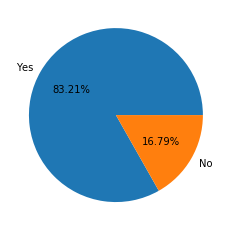

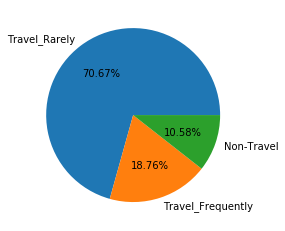

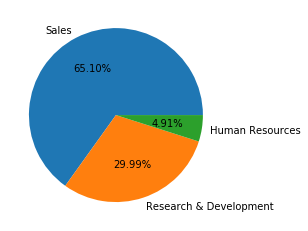

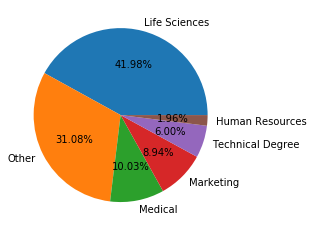

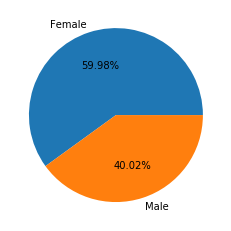

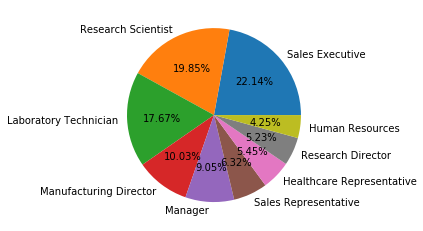

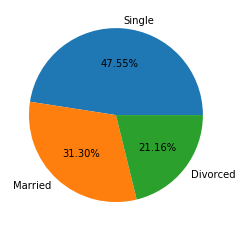

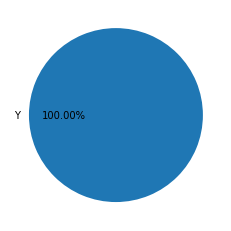

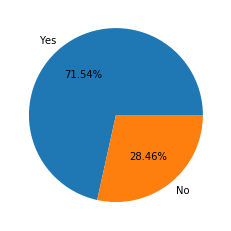

In [169]:
#(a)
for i in df_cat.columns:
    plt.pie(df_cat[i].value_counts(),labels = df_cat[i].unique(),radius = 1,autopct = "%.2f%%")
    plt.show()

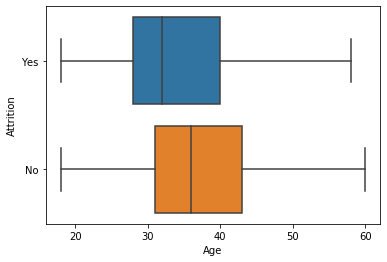

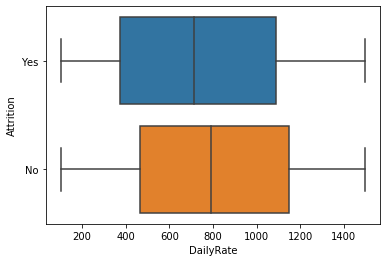

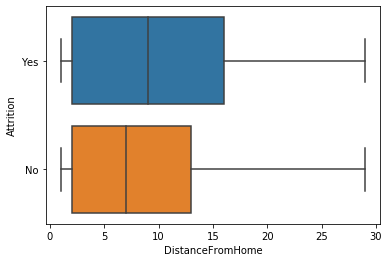

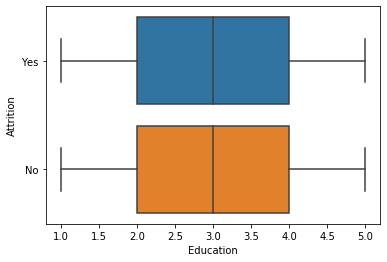

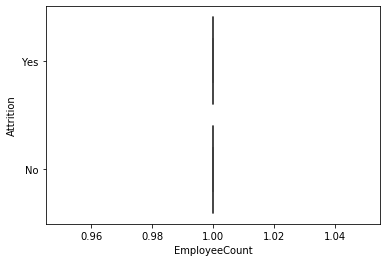

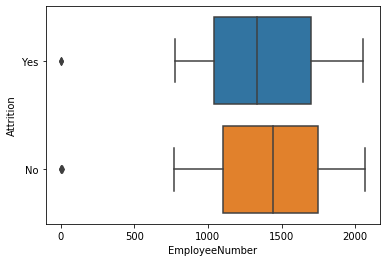

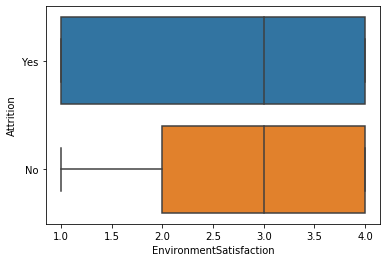

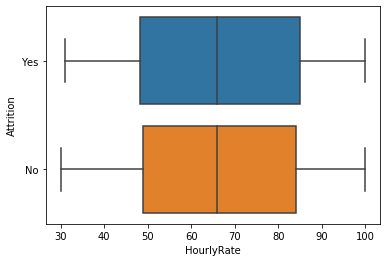

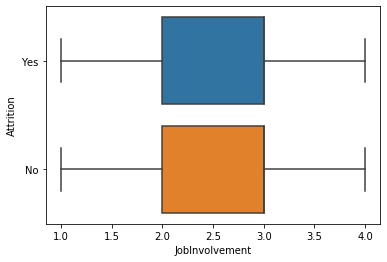

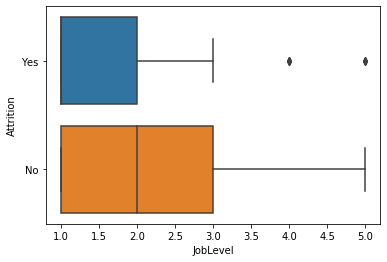

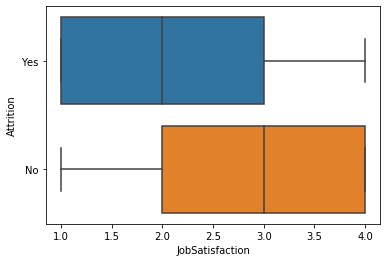

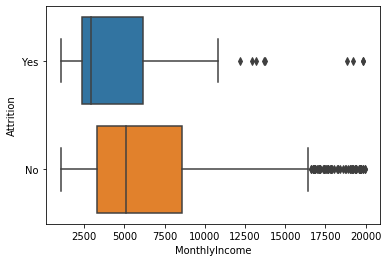

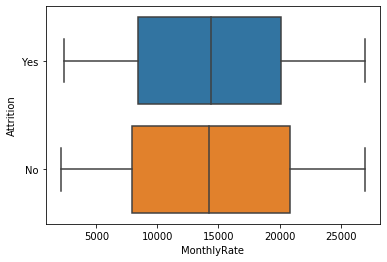

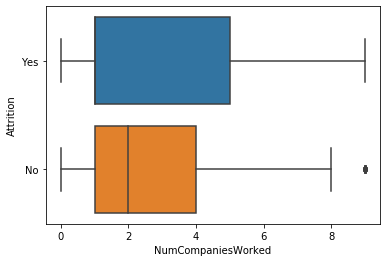

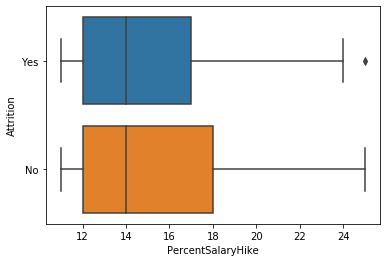

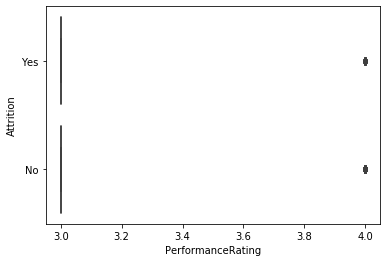

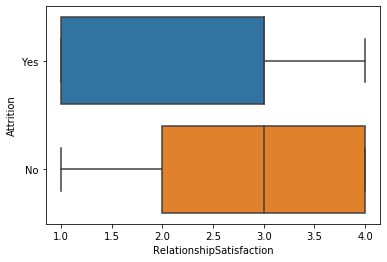

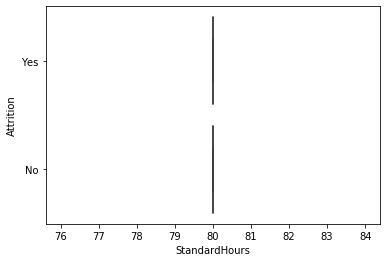

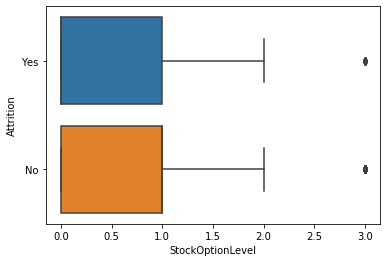

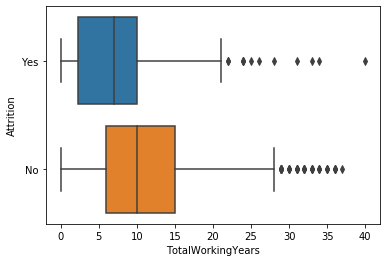

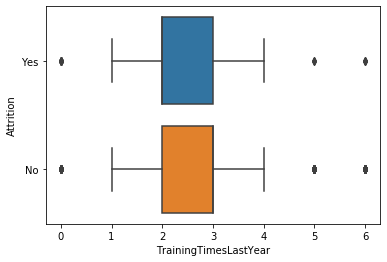

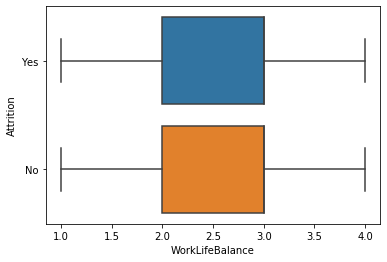

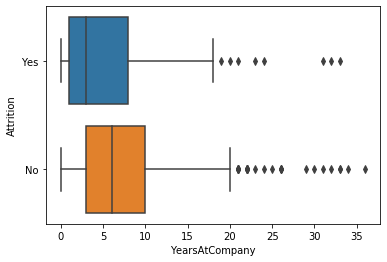

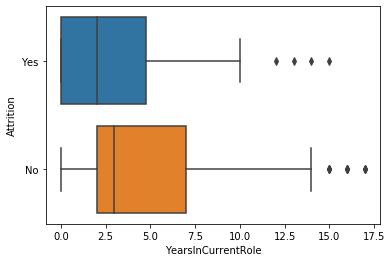

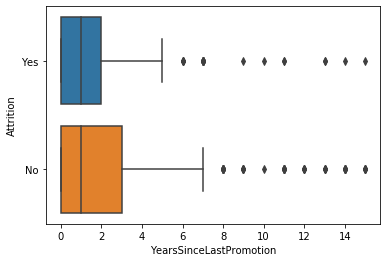

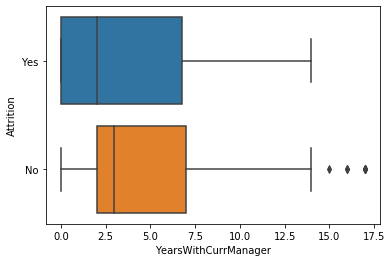

In [170]:
for i in df_num.columns:
    sns.boxplot(x=df_num[i],y=df_cat["Attrition"])
    plt.show()

In [171]:
df_num.corr()
# Age,DailyRate,Education,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MOnthlyIncome,MonthlyRate
# NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsatCurrentCompany,YearsatCurrentRole,
# YearsSinceLastPromotion,YearswithCurrManager
# are Highly correlated

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.015520,-0.005233,0.212077,NaN,-0.017604,0.013582,0.025792,0.034622,0.520783,...,0.061471,NaN,0.032462,0.676858,-0.032860,0.012281,0.324100,0.238256,0.226777,0.226257
DailyRate,0.015520,1.000000,-0.020108,-0.009338,NaN,0.003201,0.012806,0.030298,0.035912,-0.025016,...,0.003891,NaN,0.065180,-0.008607,0.013521,-0.018152,-0.041172,0.000052,-0.047206,-0.025759
DistanceFromHome,-0.005233,-0.020108,1.000000,0.044698,NaN,0.053703,-0.014468,0.028314,-0.032169,0.042163,...,-0.008785,NaN,0.023138,0.022189,-0.040041,-0.023287,0.028320,0.033588,0.022054,0.021614
Education,0.212077,-0.009338,0.044698,1.000000,NaN,0.073927,-0.044438,0.053994,0.087497,0.068250,...,-0.003042,NaN,0.048400,0.142275,-0.041359,0.038861,0.051945,0.029993,0.027814,0.051353
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.017604,0.003201,0.053703,0.073927,NaN,1.000000,-0.003121,0.051949,0.003304,-0.011062,...,0.009571,NaN,0.064411,-0.004105,0.059955,0.013211,-0.004582,0.002129,0.011194,0.032100
EnvironmentSatisfaction,0.013582,0.012806,-0.014468,-0.044438,NaN,-0.003121,1.000000,-0.048720,-0.017484,0.048311,...,0.008354,NaN,-0.005633,0.023989,-0.006879,0.025741,0.016535,0.036972,0.047141,0.014937
HourlyRate,0.025792,0.030298,0.028314,0.053994,NaN,0.051949,-0.048720,1.000000,0.052075,-0.020123,...,0.018992,NaN,0.063389,0.006975,-0.015765,-0.031628,-0.038145,-0.023047,-0.046743,-0.018476
JobInvolvement,0.034622,0.035912,-0.032169,0.087497,NaN,0.003304,-0.017484,0.052075,1.000000,-0.020090,...,0.057104,NaN,-0.015072,0.005217,-0.016530,-0.008935,-0.020598,0.032216,-0.005940,0.030889
JobLevel,0.520783,-0.025016,0.042163,0.068250,NaN,-0.011062,0.048311,-0.020123,-0.020090,1.000000,...,0.010893,NaN,0.008414,0.786607,-0.016467,0.062824,0.519802,0.386004,0.348257,0.365419


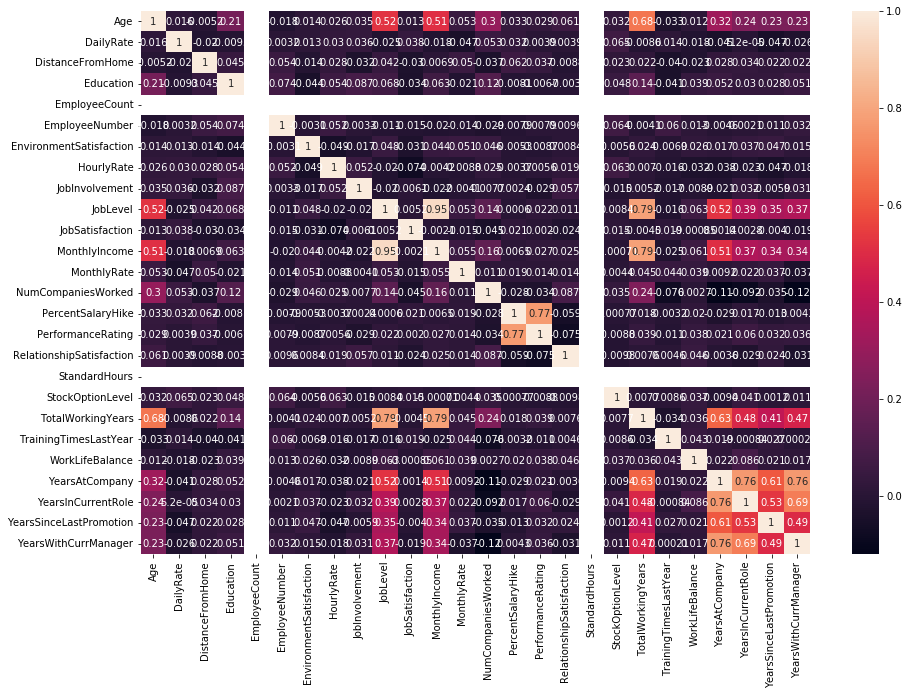

In [172]:
plt.figure(figsize = (15,10))
sns.heatmap(df_num.corr(),annot = True)

In [173]:
# All the variables are correlated with the traget variable

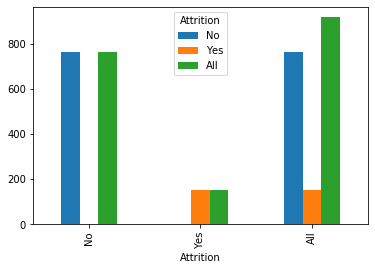

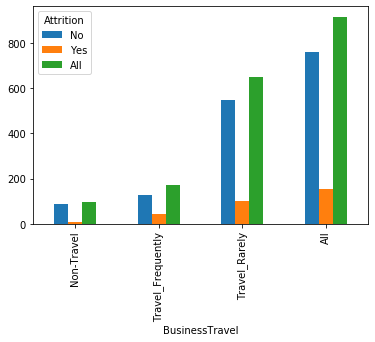

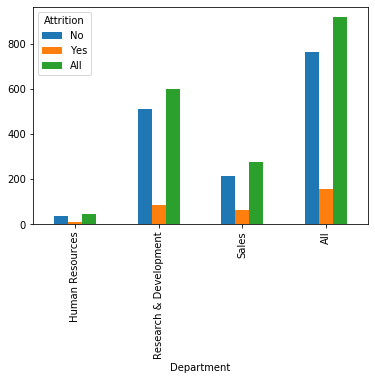

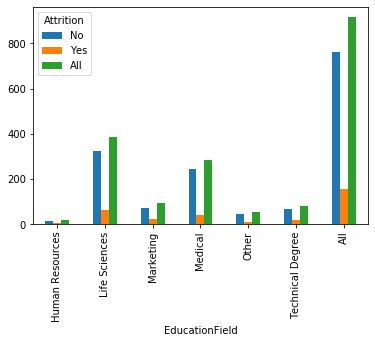

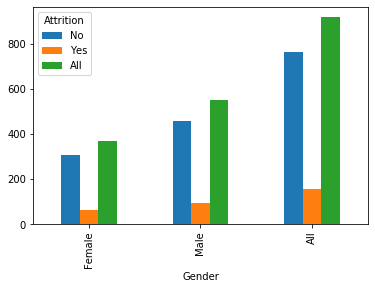

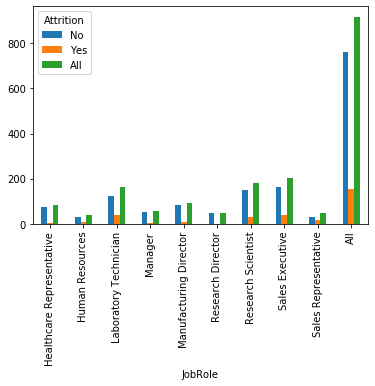

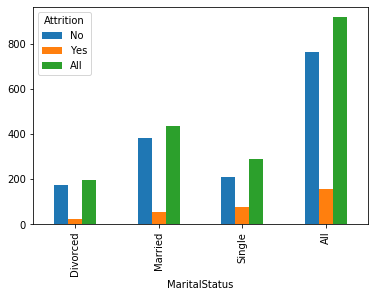

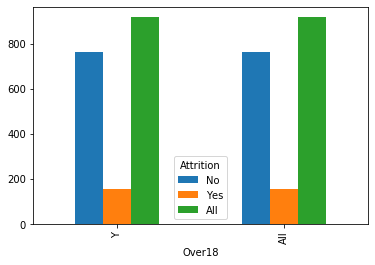

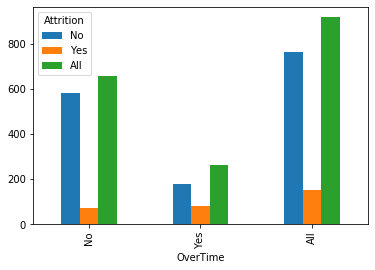

In [174]:
#(b)
for i in df_cat.columns:
    pd.crosstab(df_cat[i],df_cat["Attrition"],margins=True).plot(kind="bar")
    plt.show()

In [175]:
for i in df_cat.columns:
    t,p,d,e = stats.chi2_contingency(pd.crosstab(df_cat[i],df_cat["Attrition"],margins=True))
    print(f"{i} {p}")
# p_value is less than 0.05 than  the variables are independent
# p-value greater than 0.05 than the variables are dependent
# BusinessTravel,JobROle,MaritalStatus,OverTime are dependent on target variable
# Department,EducationField,Gender,Over18 are independent on target variable

Attrition 3.45354852918515e-197
BusinessTravel 0.028516923443512626
Department 0.20143448581293596
EducationField 0.9003146719296505
Gender 0.9999788009518927
JobRole 0.00010752699535680315
MaritalStatus 1.4047436262191789e-05
Over18 1.0
OverTime 8.734978526685155e-11


### 5.	Split dataset into train and test (70:30) (5 marks)
a.	Are both train and test representative of the overall data? How would you ascertain this statistically?


In [176]:
LE = LabelEncoder()
for i in df_cat.columns:
    encoded_values = LE.fit_transform(df_cat[i])
    df_cat[i] = encoded_values

In [177]:
final_df = pd.concat([df_num,df_cat],axis = 1)

In [178]:
final_df

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,41,1102,1,2,1,1,2,94,3,2,...,5,1,2,2,1,0,7,2,0,1
1,49,279,8,1,1,2,3,61,2,2,...,7,0,1,1,1,1,6,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,1,2,1,4,1,2,2,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,1,1,1,0,6,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,2,0,2,1,3,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,36,884,23,2,1,2061,3,41,4,2,...,3,0,1,1,3,1,2,1,0,0
913,39,613,6,1,1,2062,4,42,2,3,...,7,0,2,1,3,1,0,1,0,0
914,27,155,4,3,1,2064,2,87,4,2,...,3,0,2,1,1,1,4,1,0,1
915,49,1023,2,3,1,2065,4,63,2,2,...,8,0,1,2,3,1,7,1,0,0


In [179]:
x= final_df.drop("Attrition",axis = 1)
y = final_df["Attrition"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state = 100)

In [180]:
def chisquare(df,train,test,columns):
    for column in columns:
        overall = df[column].value_counts()
        train_dist = train[column].value_counts()
        test_dist = test[column].value_counts()
        c_table = [overall,train_dist,test_dist]
        chi2,p,dof,expected = stats.chi2_contingency(c_table)
        print(f"{column}- {p}")

In [181]:
chisquare(df,xtrain.join(ytrain),xtest.join(ytest),df_cat)
# If p_value is greater than 0.05 than it is statistically proved
# If p_value is less than 0.05 than it is not statistically proved
# All the target variables have p_value greater than 0.05 so the both train and test represents the overall data and 
# statistically proved

Attrition- 0.5879702385165737
BusinessTravel- 0.425115488357547
Department- 0.8699123547058345
EducationField- 0.556366302819662
Gender- 0.13816890572688972
JobRole- 0.9999514049719783
MaritalStatus- 0.9791478000547998
Over18- 1.0
OverTime- 0.312753211692621


### 6.	Fit a base model and explain the reason of selecting that model. Please write your key observations (15 marks) 

a.	What is the overall Accuracy? Please comment on whether it is good or not. 

b.	What is Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement.

c.	Which variables are significant?

d.	What is Cohen’s Kappa Value and what inference do you make from the model

e.	Which other key model output parameters do you want to look at? 


In [182]:
x= final_df.drop("Attrition",axis = 1)
y = final_df["Attrition"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state = 100)
logit = LogisticRegression()
logit.fit(xtrain,ytrain)
train_pred = logit.predict(xtrain)
test_pred_h = logit.predict(xtest)
test_pred_s = logit.predict_proba(xtest)[:1]
print("Accuracy train:",accuracy_score(ytrain,train_pred))
print("Accuracy Test:",accuracy_score(ytest,test_pred_h))
print("f1 train:", f1_score(ytrain,train_pred))
print("f1 test:", f1_score(ytest,test_pred_h))
print("classification train:", classification_report(ytrain,train_pred))
print("classification test:", classification_report(ytest,test_pred_h))
print("confusion train:", confusion_matrix(ytrain,train_pred))
print("confusion test:", confusion_matrix(ytest,test_pred_h))
print("Precision train:", precision_score(ytrain,train_pred))
print("Precision test:",precision_score(ytest,test_pred_h))
print("Recall Train:",recall_score(ytrain,train_pred))
print("recall test:",recall_score(ytest,test_pred_h))
print("roc train:",roc_auc_score(ytrain,train_pred))
print("roc test:",roc_auc_score(ytest,test_pred_h))
print("cohen kappa train:", cohen_kappa_score(ytrain,train_pred))
print("cohen kappa test:",cohen_kappa_score(ytest,test_pred_h))

Accuracy train: 0.8252730109204368
Accuracy Test: 0.855072463768116
f1 train: 0.034482758620689655
f1 test: 0.047619047619047616
classification train:               precision    recall  f1-score   support

           0       0.83      1.00      0.90       528
           1       0.67      0.02      0.03       113

    accuracy                           0.83       641
   macro avg       0.75      0.51      0.47       641
weighted avg       0.80      0.83      0.75       641

classification test:               precision    recall  f1-score   support

           0       0.85      1.00      0.92       235
           1       1.00      0.02      0.05        41

    accuracy                           0.86       276
   macro avg       0.93      0.51      0.48       276
weighted avg       0.88      0.86      0.79       276

confusion train: [[527   1]
 [111   2]]
confusion test: [[235   0]
 [ 40   1]]
Precision train: 0.6666666666666666
Precision test: 1.0
Recall Train: 0.017699115044247787
reca

In [183]:
#(a)
print("Accuracy train:",accuracy_score(ytrain,train_pred))
print("Accuracy Test:",accuracy_score(ytest,test_pred_h))
# Accuracy indicates the proportion of correctly predicted instances out of total instances 
# If the data is imbalance than the accuracy score is misleadoing as it reflect majority class
# The Accuracy Score we got in our base model is 0.82 percent in train data
# The Accuracy Score in test data is 0.85
# Howeever we cannot comment whether it is good or not 
# We need to consider other parameters as well

Accuracy train: 0.8252730109204368
Accuracy Test: 0.855072463768116


In [184]:
#(b)
print("Precision train:", precision_score(ytrain,train_pred))
print("Precision test:",precision_score(ytest,test_pred_h))
print("Recall Train:",recall_score(ytrain,train_pred))
print("recall test:",recall_score(ytest,test_pred_h))
print("roc train:",roc_auc_score(ytrain,train_pred))
print("f1 train:", f1_score(ytrain,train_pred))
print("f1 test:", f1_score(ytest,test_pred_h))
# Precision - The ratio of correctly predicted positive observations to the total predicted positives
# Higher the Precision indicated lowe false positive rate

# Recall - The ratio of correctly predicted positive observations to all the actual positives 
# Higher the recall indicates low false negatives

# f1_Score - The f1-score is the harmonic mean of both precision and recall, providing a balance between the 2

# The precision score for train is0.6
# The Precision score for test is 1
# The recall score for train is 0.017
# The recall score for test is 0.024
# The f1 score for train is 0.03
# The f1 score for test is 0.04

# The goal is to have balance between precision and recall  
# that is to minimize false negatives recall would be prioritized
# If we minimize false positives precision would be prioritized

Precision train: 0.6666666666666666
Precision test: 1.0
Recall Train: 0.017699115044247787
recall test: 0.024390243902439025
roc train: 0.5079025878251542
f1 train: 0.034482758620689655
f1 test: 0.047619047619047616


In [185]:
#(c)
logit = LogisticRegression(max_iter=10000)
logit.fit(xtrain,ytrain)
coefficients = logit.coef_[0]
feature_imp = pd.DataFrame({"Features":xtrain.columns,"Coefficients":coefficients})
feature_imp.sort_values(by="Coefficients",ascending=True)

# EmployeeCount,DistanceFromHome,StandardHours,EducationField,PerformanceRating,Gender,YearsAtCompany,
# YearsSinceLastPromotion,NumCompaniesWorked,BusinessTravel,Department,MaritalStatus,OverTime
# are the significant variables

,Features,Coefficients
10,JobSatisfaction,-0.437964
6,EnvironmentSatisfaction,-0.325150
8,JobInvolvement,-0.259096
16,RelationshipSatisfaction,-0.199762
20,TrainingTimesLastYear,-0.178848
23,YearsInCurrentRole,-0.149201
18,StockOptionLevel,-0.141515
25,YearsWithCurrManager,-0.128877
21,WorkLifeBalance,-0.089310
19,TotalWorkingYears,-0.088411


In [186]:
#(d)
print("cohen kappa train:", cohen_kappa_score(ytrain,train_pred))
print("cohen kappa test:",cohen_kappa_score(ytest,test_pred_h))
# Cohen Kappa Score - The Statistical Measure that compares an observed accuracy with an expected accuracy
# It is used to measure the inter-rater reliability for categorical variables
# cohen Kappa score is one than it is almost perfect
# The Cohen Kappa Score for train data is 0.025 which is slight agreement
# The Cohen Kappa Score for test data is 0.04 which is slight agreement

cohen kappa train: 0.025597871820624896
cohen kappa test: 0.0408340573414423


In [187]:
#(e)
print("classification train:", classification_report(ytrain,train_pred))
print("classification test:", classification_report(ytest,test_pred_h))
print("confusion train:", confusion_matrix(ytrain,train_pred))
print("confusion test:", confusion_matrix(ytest,test_pred_h))
print("roc train:",roc_auc_score(ytrain,train_pred))
print("roc test:",roc_auc_score(ytest,test_pred_h))
# The other metrics we can consider are roc auc score the area under the curve tells us how many data points does our model 
# covering
# We can give clasification report where all the metrics are read on the same report
# We can give confusion matrix to know how many true positives,true negatives, false positives and false negatives are there

classification train:               precision    recall  f1-score   support

           0       0.83      1.00      0.90       528
           1       0.67      0.02      0.03       113

    accuracy                           0.83       641
   macro avg       0.75      0.51      0.47       641
weighted avg       0.80      0.83      0.75       641

classification test:               precision    recall  f1-score   support

           0       0.85      1.00      0.92       235
           1       1.00      0.02      0.05        41

    accuracy                           0.86       276
   macro avg       0.93      0.51      0.48       276
weighted avg       0.88      0.86      0.79       276

confusion train: [[527   1]
 [111   2]]
confusion test: [[235   0]
 [ 40   1]]
roc train: 0.5079025878251542
roc test: 0.5121951219512195


### 7.	How do you improve overall efficiency of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model. (20 marks)
Please feel free to have any number of iterations to get to the final answer. Marks are awarded based on the quality of final model you are able to achieve. 


In [188]:
# Decision Tree Classifier

x= final_df.drop("Attrition",axis = 1)
y = final_df["Attrition"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state = 100)

dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
train_pred = dt.predict(xtrain)
test_pred_h = dt.predict(xtest)
test_pred_s = dt.predict_proba(xtest)[:1]
print("classification test:", classification_report(ytest,test_pred_h))

# The accuracy is 78%
# Precision and recall are balanced 87 and 87 percent for 0 rescpectively
#  27 and 27 for 1 respectively

classification test:               precision    recall  f1-score   support

           0       0.87      0.87      0.87       235
           1       0.27      0.27      0.27        41

    accuracy                           0.78       276
   macro avg       0.57      0.57      0.57       276
weighted avg       0.78      0.78      0.78       276



In [189]:
# Startify 
x= final_df.drop("Attrition",axis = 1)
y = final_df["Attrition"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state = 100,stratify = y)

dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
train_pred = dt.predict(xtrain)
test_pred_h = dt.predict(xtest)
test_pred_s = dt.predict_proba(xtest)[:1]
print("classification test:", classification_report(ytest,test_pred_h))

# The accuracy is 79%
# Precision and recall are balanced 39 and 48 percent for 1 rescpectively
#  89 and 85 for 0 respectively

classification test:               precision    recall  f1-score   support

           0       0.89      0.85      0.87       230
           1       0.39      0.48      0.43        46

    accuracy                           0.79       276
   macro avg       0.64      0.67      0.65       276
weighted avg       0.81      0.79      0.80       276



In [190]:
# Significant Variables
sv = pd.DataFrame(dt.feature_importances_,index = xtrain.columns).sort_values(by=0,ascending=False)
sig_var = sv.reset_index()
var = sig_var[sig_var[0]>0]["index"]

In [191]:
x= final_df[var]
y = final_df["Attrition"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state = 100,stratify = y)

dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
train_pred = dt.predict(xtrain)
test_pred_h = dt.predict(xtest)
test_pred_s = dt.predict_proba(xtest)[:1]
print("classification test:", classification_report(ytest,test_pred_h))

# The accuracy is 78%
# Precision and recall are balanced 37 and 41 percent for 1 rescpectively
#  88 and 86 for 0 respectively

classification test:               precision    recall  f1-score   support

           0       0.88      0.86      0.87       230
           1       0.37      0.41      0.39        46

    accuracy                           0.78       276
   macro avg       0.62      0.63      0.63       276
weighted avg       0.79      0.78      0.79       276



In [192]:
# Scalar

ss = StandardScaler()
x= final_df[var]
y = final_df["Attrition"]
x= ss.fit_transform(x)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state = 100,stratify = y)

dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
train_pred = dt.predict(xtrain)
test_pred_h = dt.predict(xtest)
test_pred_s = dt.predict_proba(xtest)[:1]
print("classification test:", classification_report(ytest,test_pred_h))

# The accuracy is 77%
# Precision and recall are balanced 35 and 41 percent for 1 rescpectively
#  88 and 84 for 0 respectively

classification test:               precision    recall  f1-score   support

           0       0.88      0.84      0.86       230
           1       0.35      0.41      0.38        46

    accuracy                           0.77       276
   macro avg       0.61      0.63      0.62       276
weighted avg       0.79      0.77      0.78       276



In [193]:
# Decision Tree Tuned

tuned_params = [{"criterion":["entropy","gini"],"max_depth":[3,4,5,6,7,8,9],"max_leaf_nodes":[3,4,5]}]

dt= DecisionTreeClassifier()
dt_grid = GridSearchCV(estimator = dt,param_grid=tuned_params,n_jobs=-1)
dt_grid.fit(xtrain,ytrain)
dt_grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 5}

In [194]:
x= final_df[var]
y = final_df["Attrition"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state = 100,stratify = y)

dt = DecisionTreeClassifier(criterion = 'gini', max_depth= 3, max_leaf_nodes= 5)
dt.fit(xtrain,ytrain)
train_pred = dt.predict(xtrain)
test_pred_h = dt.predict(xtest)
test_pred_s = dt.predict_proba(xtest)[:1]
print("classification test:", classification_report(ytest,test_pred_h))

# The accuracy is 83%
# Precision and recall are balanced 50 and 20 percent for 1 rescpectively
#  86 and 96 for 0 respectively
# Precision and recall are imbalanced

classification test:               precision    recall  f1-score   support

           0       0.86      0.96      0.91       230
           1       0.50      0.20      0.28        46

    accuracy                           0.83       276
   macro avg       0.68      0.58      0.59       276
weighted avg       0.80      0.83      0.80       276



In [195]:
x= final_df[var]
y = final_df["Attrition"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state = 100,stratify = y)

rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
train_pred = rf.predict(xtrain)
test_pred_h = rf.predict(xtest)
test_pred_s = rf.predict_proba(xtest)[:1]
print("classification test:", classification_report(ytest,test_pred_h))

# The accuracy is 85%
# Precision and recall are balanced 67 and 17 percent for 1 rescpectively
#  86 and 98 for 0 respectively
# Precision and recall are imbalanced

classification test:               precision    recall  f1-score   support

           0       0.86      0.98      0.91       230
           1       0.67      0.17      0.28        46

    accuracy                           0.85       276
   macro avg       0.76      0.58      0.60       276
weighted avg       0.82      0.85      0.81       276



In [196]:
x= final_df[var]
y = final_df["Attrition"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state = 100,stratify = y)

gb = GaussianNB()
gb.fit(xtrain,ytrain)
train_pred = gb.predict(xtrain)
test_pred_h = gb.predict(xtest)
test_pred_s = gb.predict_proba(xtest)[:1]
print("classification test:", classification_report(ytest,test_pred_h))

# The accuracy is 76%
# Precision and recall are balanced 36 and 54 percent for 1 rescpectively
#  90 and 81 for 0 respectively
# Precision and recall are imbalanced

classification test:               precision    recall  f1-score   support

           0       0.90      0.81      0.85       230
           1       0.36      0.54      0.43        46

    accuracy                           0.76       276
   macro avg       0.63      0.68      0.64       276
weighted avg       0.81      0.76      0.78       276



### 8.	Summarize as follows (10 marks) 

1.	Summarize the overall fit of the model and list down the measures to prove that it is a good model

2.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.

3.	What changes from the base model had the most effect on model performance?

4.	What are the key risks to your results and interpretation?


In [143]:
#(1)
# 100% accuracy suggests good fit
# This is crucial in scenarios where false positives are costly for precision
# This is critical when false negatives are more concerning for recall
# Higher Cohen Kappa value suggests that the model performs well beyond random chance
# Roc Score close to 1 indicates better performance between the class

# Decision Tree 
# The accuracy is 78%
# Precision and recall are balanced 87 and 87 percent for 0 class rescpectively
# 24 and 27 for 1 class respectively

# Stratify
# The accuracy is 78%
# Precision and recall are balanced 37 and 46 percent for 1 rescpectively
# 89 and 85 for 0 respectively

# Scalar
# The accuracy is 77%
# Precision and recall are balanced 35 and 41 percent for 1 rescpectively
# 88 and 84 for 0 respectively

# Significant Variable
# The accuracy is 78%
# Precision and recall are balanced 37 and 41 percent for 1 rescpectively
# 88 and 86 for 0 respectively

# Tuned
# The accuracy is 83%
# Precision and recall are balanced 50 and 20 percent for 1 rescpectively
# 86 and 96 for 0 respectively
# Precision and recall are imbalanced

# Random Forest
# The accuracy is 85%
# Precision and recall are balanced 67 and 17 percent for 1 rescpectively
# 86 and 98 for 0 respectively
# Precision and recall are imbalanced

# GaussianNB
# The accuracy is 76%
# Precision and recall are balanced 36 and 54 percent for 1 rescpectively
# 90 and 81 for 0 respectively
# Precision and recall are imbalanced

# In Tuned and Random Forest eventhough the accuracy is high compared to other models the recall and precision are imbalance
# Significant Variable model gives better model when compared to other models where the accuracy is 78% and recall and 
# precision are balanced

In [158]:
#(2) 
# The Business want to know what was the Attrition rate either yes or no
# According to the provided data not all variables are significant
# The significant variables are 
sv = pd.DataFrame(dt.feature_importances_,index = xtrain.columns).sort_values(by=0,ascending=False)
sig_var = sv.reset_index()
var = sig_var[sig_var[0]>0]["index"]
var
# These are the significant variables specified that are effecting the target variable and bringing changes in the model
# Performance
# Where as these significant variables become independent variables and the target variable will be our dependent variable
# Using Significant variables might increase the accuracy and balance in recall and precision
# Significant variables helps in increasing the model paerformance

0               MonthlyIncome
1           TotalWorkingYears
2                  HourlyRate
3          YearsInCurrentRole
4                    OverTime
5            DistanceFromHome
6        YearsWithCurrManager
7     YearsSinceLastPromotion
8               MaritalStatus
9          NumCompaniesWorked
10                        Age
11           StockOptionLevel
12                  DailyRate
13                MonthlyRate
14                   JobLevel
15            WorkLifeBalance
16    EnvironmentSatisfaction
17                 Department
18             YearsAtCompany
19             JobInvolvement
20             EmployeeNumber
21          PercentSalaryHike
22      TrainingTimesLastYear
23            JobSatisfaction
Name: index, dtype: object

In [144]:
#(3)
# feature engineering - Adding interaction terms may have improve the model performance by 
# capturing non linear relationships

# Handling Multicollinearity - Checking which variables have high multicollinearity based on their VIF scores
# and take measures to eith reduce the multicollinearity or remove the variables if possible

# HyperParameter Tuning - Adjusting model hyperparameters regularizes the strength in logistic regression may have led to
# better performance

In [ ]:
#(4)
# Multicollinearity - Multicollinearity influences standard error and make it difficult to access significance errors

# Overfitting - The model performs exceptionally well on training data and poorly on testing data

# Data Quality - Presence of outliers and missing values can skew the model results

# Assumption violation - Logistic assumption such as linearity of log odds ,independence of errors and
# absence of multicollinearity if violated can impact model reliability

# Mitigation -
# Regular monitor of model performance

# perform rigourius data preprocessing to handle outliers and missing values

# handle multicollinearity

# validate assumptions using appropriate statistical test and plots